**Data Science Project WS 20/21 Group B** </br>
*Julia Blume, Ayreen Japutri, Vahe Shelunts, Nitish Acharya, Elias Brummund* </br>
</br>

This Project is based on data from the Two Sigma Connect: Rental Listing Inquiries kaggle competition, which can be found under the following link: https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries

For purposes of a better performance and a better overview, we divided our Project into 5 Different notebooks that deal about the following topics:
1. Exploratory Data Analysis
2. Data Cleaning
3. Feature Engineering
4. Modeling
5. Explanation of the models

Throughout our project we focused on the aspect of interpretable machine learning as it was asked in the project description. Therefore, we were more focusing on explaining what our idea was and what we were doing instead of focusing on the model performance only. Keeping this aspect in mind will be important for chapter 4.

Before jumping into EDA, we would like to give a brief overview about our approaches throughout this whole project. So, you know what to expect throughout the following notebooks. After getting to know the data in the EDA, we will check the dataframe for outliers and null values in notebook 2 data cleaning. On the cleaned data we will apply some feature engineering techniques in notebook 3. We will add the number of photos available for the listing as a column, we will encode the top 10 keywords for the description as well as for the features columns and we will derive the top 10 neighborhoods from longitude and latitude and also encode them as new columns to the dataframe. With this optimized dataframe we will then train and prune a random forest and a decision tree in notebook 4. Last but not least we will explain the predictions of those two models globally and locally in notebook 5.

Alright, let's get started and get a brief overview about the data we will work with throughout our project in the following notebook about EDA.

# 1. Exploratory Data Analysis (EDA)

This first notebook deals with the exploratory data analysis of the dataset, that we will handle throughout our project.

**Librarys used** </br>
First of all, we will import all the libraries, that will be used throughout this notebook. In order to be able to work with it, please run the cell below first to identify all packages that need to be installed before going further into our notebook.

In [1]:
#import all libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json('data/train.json')
df.head(5)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


Overall, there are 49352 values in the train dataset. As we can see, there are no missing values in the data. However, there is a possibility that there are invalid/wrong values which will be checked in the EDA and data preprocessing part. 
Also, it is noteworthy that the data type of some columns is wrong (e.g 'created' column should be a datetime value instead of object, number of bathrooms/bedrooms should be a categorical one). In the next step, those column data types will be changed.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


Now, the data is ready for exploration. Let's dive deep! :)

In [5]:
pd.set_option('display.float_format', lambda x: '%.5f' % x) #eliminate scientific notation for numeric columns
plt.rcParams['figure.figsize'] = (8, 6) #setting global graph size

In [6]:
sns.set(style='whitegrid', palette='dark') #sns style

In [7]:
df_eda = df.copy()

In [8]:
df_eda['created'] = pd.to_datetime(df_eda.created) #converting created to datetime object
df_eda['bedrooms'] = pd.Categorical(df_eda.bedrooms) #converting bathrooms to categorical type
df_eda['bathrooms'] = pd.Categorical(df_eda.bathrooms) #converting bedrooms to categorical type

First, let's understand the distribution of apartment prices

In [9]:
df_eda['price'].describe()

count     49352.00000
mean       3830.17404
std       22066.86588
min          43.00000
25%        2500.00000
50%        3150.00000
75%        4100.00000
max     4490000.00000
Name: price, dtype: float64

The average apartment price is 3830 with 25 and 75 percentiles being 2500 and 4100 respectively. There are also some very high values (over 4 million) which might hint that there are outliers in the data. Those outliers will be checked later.
Now, let's get a graph with a better visualisation of the distribution.

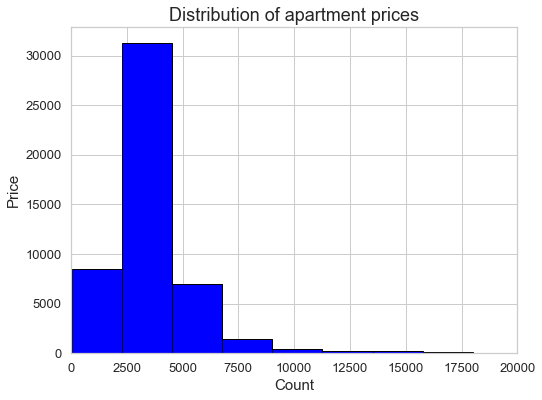

In [10]:
plt.hist(df_eda.price, bins=2000, color='blue', edgecolor='black')
plt.title('Distribution of apartment prices', fontsize = 18)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlim(0,20000);

Now let's dive deeper and understand where these large values lie. Perhaps those values are assigned to specific apartments with certain number of bedrooms. Let's plot a boxplot for apartments with different number of bedrooms and check their price distributions.

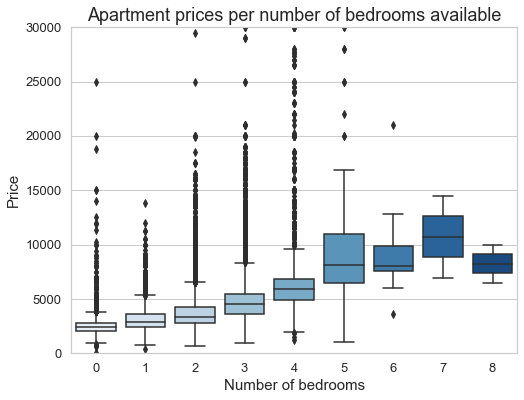

In [11]:
sns.boxplot(x='bedrooms', y = 'price', data=df_eda, palette='Blues')
plt.ylim(0,30000)
plt.ylabel('Price', fontsize = 15)
plt.xlabel('Number of bedrooms', fontdict={'fontsize': 15})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Apartment prices per number of bedrooms available', fontsize = 18);

The graph output is pretty interesting. First of all, it suggests that the average price per apartment increases with number of bedrooms (which makes a lot of sense). Also, it suggests that apartments with certain number of bedrooms have outliers (those up to 6 bedrooms). Also those with 7 and 8 bedroooms do not have any which is contrary to the initial assumption that suspicious high values might lie within listings that illustrate big apartments with a lot of rooms. Two things to note here:

 - Outliers shown by the graph might not be outliers. Those outliers are calculcated with inter-quartile ranges however the context of the data must be taken into account before deciding whether it is an outlier or not. Prices can be put differently and there is no specific scale which could define an outlier. Another technique (3 standard deviations within the mean) will be also used to check for outliers.
 - Apartments with 7 and 8 bedrooms might have small number of instances in the data which might explain the fact that there are no outliers idetntified. The frequency distribution of apartment bedrooms will be checked next.

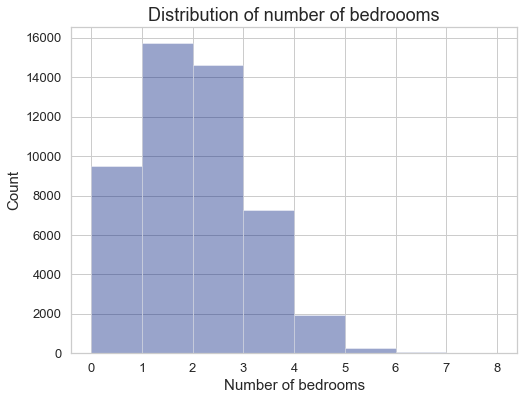

In [12]:
ax = sns.distplot(df_eda['bedrooms'], kde=False, bins=8)
ax.set_xlabel('Number of bedrooms', fontdict={'fontsize': 15})
ax.set_ylabel('Count', fontdict={'fontsize': 15})
ax.set_title('Distribution of number of bedroooms',fontdict={'fontsize': 18})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

This graph shows that most listings have 0, 1 and 2 bedrooms. Those with 0 bedrooms are assumed to be studios but will also be checked shortly. And as expected, we have very little number of 7 and 8 bedroom apartments which explains lack of outliers and average figures.

In [13]:
df_eda['description'][df_eda['bedrooms' ] == 0][:10]

15     Over-sized Studio w abundant closets. Availabl...
19     No Fee Large Renovated Sun Splashed Studio. Wa...
33     Location: Upper East SideAmazing studio with h...
38     This is a luxurious JR 1 bedroom with tons of ...
43     BRIGHT &  LARGE STUDIO  APARTMENT + OUTDOOR SP...
66     A detailed description is coming soon. Please ...
84     Gut Renovated w/High ceilings: Immaculate, nat...
88     Call / Text / Email Afrim today to schedule a ...
104    NO BROKER FEE.  Large south facing studio.    ...
107    Apartment:This Bi-Level Studio, 1 bathroom res...
Name: description, dtype: object

Looking at the description of first 10 instances with 0 bedrooms, it looks like those are studios apartments.

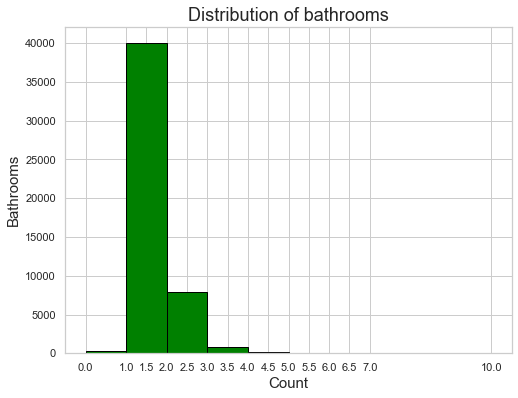

In [14]:
plt.hist(df_eda['bathrooms'], color='green', edgecolor = 'black')
plt.title('Distribution of bathrooms', fontsize = 18)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Bathrooms', fontsize = 15)
plt.xticks(df_eda.bathrooms.unique());

Most of apartment listings have 1-3 bathrooms. It is noteworthy that some listing have values with .5 decimal points. It might be because those apartments had rooms that were divided and part of the initial room was separated into another room.
Also, we have apartments with 7 and 10 bathrooms which might be due to invalid data. That will also be checked.

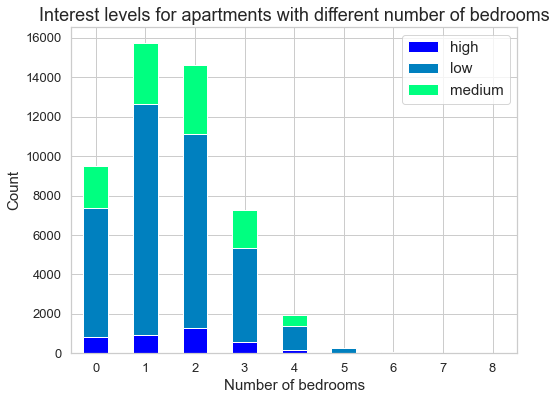

In [15]:
df_eda.groupby('bedrooms')['interest_level'].value_counts().unstack(level=1).plot.bar(stacked=True, colormap='winter')
plt.xlabel('Number of bedrooms', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Interest levels for apartments with different number of bedrooms', fontsize=18)
plt.xticks(fontsize=13, rotation = 0)
plt.yticks(fontsize=13)
plt.legend(fontsize=15);

In this graph we can see that all listings, irrespective of number of bedrooms, had low interest levels. Next, let's check if price explains those interest levels.

In [16]:
grouped = df_eda.loc[:,['price', 'interest_level']] \
    .groupby(['interest_level']) \
    .median() \
    .sort_values(by='price', ascending=False) #grouping and sorting interest_levels for the graph

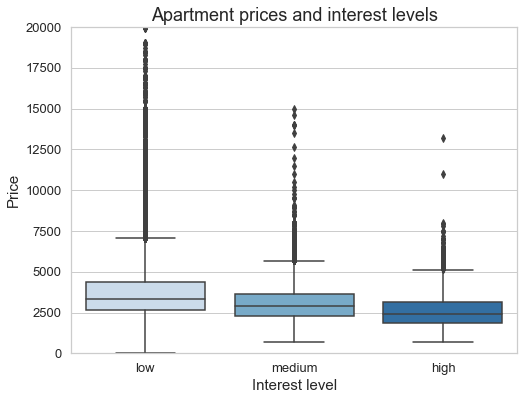

In [17]:
sns.boxplot(x = 'interest_level', y = 'price' , data = df_eda, palette='Blues', order=grouped.index)
plt.title('Apartment prices and interest levels', fontsize = 18)
plt.xlabel('Interest level', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.ylim(0,20000)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

The graph shows that the higher the interest level, the lower is the median price of the listing. Now let's draw some graphs and understand the timing of listings in terms of days posted.

In [18]:
#creating weekday column with sorted values of weekdays (with potential predictive power)
sorted_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_eda['weekday'] = df_eda['created'].dt.day_name()
df_eda['weekday'] = pd.Categorical(df_eda['weekday'], sorted_days) #sorting by weekdays

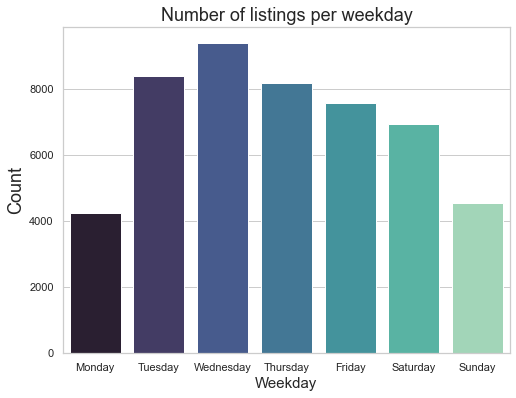

In [19]:
ax = sns.countplot(df_eda['created'].dt.day_name(), order=sorted_days, palette='mako');
ax.set_title('Number of listings per weekday', fontdict={'fontsize':18})
ax.set_xlabel('Weekday', fontdict={'fontsize':15})
ax.set_ylabel('Count', fontdict={'fontsize':18});

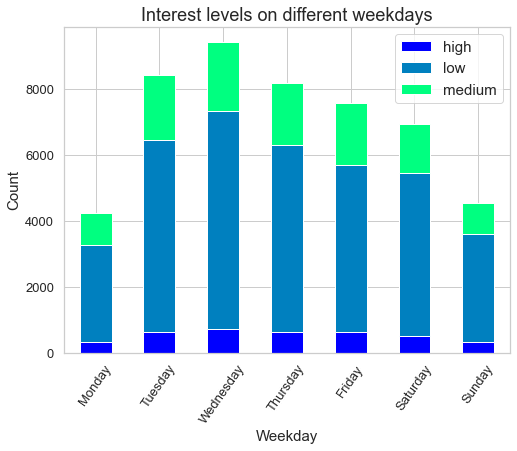

In [20]:
df_eda.groupby(by='weekday')['interest_level'].value_counts().unstack(level=1).plot.bar(stacked=True, colormap='winter')
plt.xlabel('Weekday', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Interest levels on different weekdays', fontsize=18)
plt.xticks(rotation=55)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=15);

It can be seen that the highest number of listing as well as the highest amount of the interest level 'high' is on wednesdays.